In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [5]:
display(train_data.shape)
display(test_data.shape)

(11504798, 12)

(7669866, 11)

# Data Preprocessing

In [6]:
# 필요 없는 변수 제거
train_data.drop(['id'], axis=1, inplace=True)
test_data.drop(['id'], axis=1, inplace=True)

In [7]:
# 범주형 변수 object로 변환
# 범주형 데이터 int -> object로 변환
train_data['Driving_License'] = train_data['Driving_License'].astype('object')
train_data['Region_Code'] = train_data['Region_Code'].astype('object')
train_data['Previously_Insured'] = train_data['Previously_Insured'].astype('object')
train_data['Policy_Sales_Channel'] = train_data['Policy_Sales_Channel'].astype('object')
#train_data['Response'] = train_data['Response'].astype('object')

test_data['Driving_License'] = test_data['Driving_License'].astype('object')
test_data['Region_Code'] = test_data['Region_Code'].astype('object')
test_data['Previously_Insured'] = test_data['Previously_Insured'].astype('object')
test_data['Policy_Sales_Channel'] = test_data['Policy_Sales_Channel'].astype('object')

In [8]:
# 데이터 분할
x_train = train_data.drop(['Response'], axis=1)
y_train = train_data['Response']
x_test = test_data

# 범주형 데이터 더미처리
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [9]:
# 학습 데이터와 테스트 데이터에서 동일한 컬럼을 유지
x_train, x_test = x_train.align(x_test, join='outer', axis=1, fill_value=0)

In [10]:
# 데이터 샘플링 (예: 10% 데이터만 사용)
sample_fraction = 0.01  # 샘플 비율 (1%)
x_sample, y_sample = x_train[:int(sample_fraction * len(x_train))], y_train[:int(sample_fraction * len(y_train))]


In [9]:
# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# 모델 정의
model = RandomForestClassifier()

# Val DataSet으로 성능 확인
x_tr, x_val, y_tr, y_val = train_test_split(x_sample, y_sample, test_size=0.3, random_state=42)

# 모델 학습
model.fit(x_tr, y_tr)


RandomForestClassifier()

In [10]:
# 예측
y_pred = model.predict(x_val)

# 성능 확인
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
#display(accuracy_score(y_val, y_pred))
#display(f1_score(y_val, y_pred))
#display(recall_score(y_val, y_pred))
#display(precision_score(y_val, y_pred))
display(roc_auc_score(y_val, y_pred))

0.5579392189063478

In [1]:
from pycaret.classification import *

In [2]:
import mlflow

In [11]:
pycaretData = pd.concat([x_sample, y_sample], axis=1)

In [12]:
pycaretData

,Age,Annual_Premium,Driving_License_0,Driving_License_1,Gender_Female,Gender_Male,Policy_Sales_Channel_1.0,Policy_Sales_Channel_10.0,Policy_Sales_Channel_100.0,Policy_Sales_Channel_101.0,...,Region_Code_7.0,Region_Code_8.0,Region_Code_9.0,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Vintage,Response
0,21,65101.0,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,187,0
1,43,58911.0,False,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,288,1
2,25,38043.0,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,254,0
3,35,2630.0,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,76,0
4,36,31951.0,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115042,46,23178.0,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,274,0
115043,50,40512.0,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,146,1
115044,23,24953.0,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,210,0
115045,25,2630.0,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,193,0


In [13]:
# SETUP
exp = setup(pycaretData, target='Response',numeric_features=['Age', 'Annual_Premium'], normalize=True)
#데이터 : data
#타겟 : class 열
#numeric_features : d_ct, ip_ct 열을 숫자형 열로 인식 시키기 위해 설정 (안할시 카테고리 열로 인식함)


,Description,Value
0,Session id,4923
1,Target,Response
2,Target type,Binary
3,Original data shape,"(115047, 223)"
4,Transformed data shape,"(115047, 223)"
5,Transformed train set shape,"(80532, 223)"
6,Transformed test set shape,"(34515, 223)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8792,0.8643,0.0298,0.5724,0.0565,0.0448,0.1090,1.4870
dummy,Dummy Classifier,0.8785,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4590
ridge,Ridge Classifier,0.8784,0.0000,0.0012,0.4286,0.0024,0.0017,0.0171,0.4650
gbc,Gradient Boosting Classifier,0.8784,0.8601,0.0010,0.3750,0.0020,0.0014,0.0141,3.3850
ada,Ada Boost Classifier,0.8782,0.8565,0.0125,0.4706,0.0243,0.0179,0.0601,1.2440
lr,Logistic Regression,0.8781,0.8503,0.0047,0.3951,0.0093,0.0063,0.0312,1.0330
lda,Linear Discriminant Analysis,0.8769,0.8473,0.0215,0.3912,0.0406,0.0282,0.0672,1.3780
svm,SVM - Linear Kernel,0.8759,0.0000,0.0145,0.2608,0.0271,0.0159,0.0354,0.9490
rf,Random Forest Classifier,0.8666,0.8365,0.1300,0.3637,0.1915,0.1362,0.1579,2.0760
et,Extra Trees Classifier,0.8555,0.8228,0.1743,0.3242,0.2267,0.1549,0.1640,2.9560


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4923, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [15]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8792,0.8716,0.0245,0.5714,0.0470,0.0374,0.0997
1,0.8789,0.8641,0.0419,0.5256,0.0776,0.0607,0.1223
2,0.8782,0.8597,0.0337,0.4783,0.0630,0.0478,0.1016
3,0.8784,0.8643,0.0286,0.4912,0.0541,0.0413,0.0956
4,0.8794,0.8637,0.0297,0.5686,0.0564,0.0449,0.1093
5,0.8798,0.8644,0.0276,0.6279,0.0528,0.0430,0.1135
6,0.8807,0.8723,0.0276,0.7500,0.0532,0.0450,0.1289
7,0.8795,0.8609,0.0276,0.6000,0.0527,0.0425,0.1097
8,0.8797,0.8561,0.0266,0.6190,0.0509,0.0413,0.1102


In [16]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8796,0.8705,0.0276,0.6000,0.0527,0.0425,0.1098
1,0.8789,0.8583,0.0317,0.5345,0.0598,0.0468,0.1076
2,0.8786,0.8578,0.0245,0.5000,0.0468,0.0358,0.0897
3,0.8792,0.8607,0.0266,0.5532,0.0507,0.0400,0.1013
4,0.8792,0.8639,0.0235,0.5610,0.0451,0.0357,0.0963
5,0.8789,0.8591,0.0235,0.5476,0.0451,0.0354,0.0944
6,0.8798,0.8694,0.0215,0.6774,0.0416,0.0344,0.1057
7,0.8794,0.8582,0.0245,0.6000,0.0471,0.0379,0.1034
8,0.8778,0.8540,0.0143,0.4242,0.0277,0.0199,0.0594


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


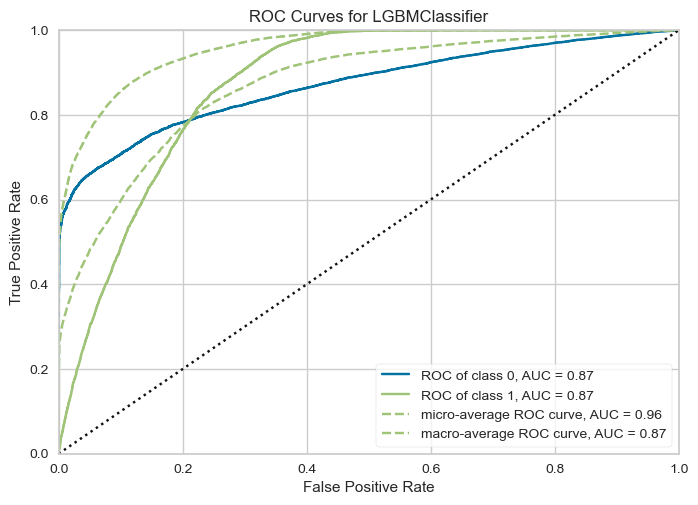

In [17]:
plot_model(model)